## Importing libraries

In [64]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import joblib
%matplotlib inline

In [35]:
# Loading the data using pandas
data = pd.read_csv('penguin.csv')
data.head(5)

,studyName,Sample Number,Species,Region,Island,Stage,Individual ID,Clutch Completion,Date Egg,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo),Comments
0,PAL0708,1,Adelie Penguin,Anvers,Torgersen,"Adult, 1 Egg Stage",N1A1,Yes,11-11-2007,39.1,18.7,181.0,3750.0,MALE,NaN,NaN,Not enough blood for isotopes.
1,PAL0708,2,Adelie Penguin,Anvers,Torgersen,"Adult, 1 Egg Stage",N1A2,Yes,11-11-2007,39.5,17.4,186.0,3800.0,FEMALE,8.94956,-24.69454,NaN
2,PAL0708,3,Adelie Penguin,Anvers,Torgersen,"Adult, 1 Egg Stage",N2A1,Yes,11/16/07,40.3,18.0,195.0,3250.0,FEMALE,8.36821,-25.33302,NaN
3,PAL0708,4,Adelie Penguin,Anvers,Torgersen,"Adult, 1 Egg Stage",N2A2,Yes,11/16/07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Adult not sampled.
4,PAL0708,5,Adelie Penguin,Anvers,Torgersen,"Adult, 1 Egg Stage",N3A1,Yes,11/16/07,36.7,19.3,193.0,3450.0,FEMALE,8.76651,-25.32426,NaN


In [37]:
data.shape

(344, 17)

In [38]:
# Information of the dataset
data.describe()

,Sample Number,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Delta 15 N (o/oo),Delta 13 C (o/oo)
count,344.000000,342.000000,342.000000,342.000000,342.000000,330.000000,331.000000
mean,63.151163,43.921930,17.151170,200.915205,4201.754386,8.733382,-25.686292
std,40.430199,5.459584,1.974793,14.061714,801.954536,0.551770,0.793961
min,1.000000,32.100000,13.100000,172.000000,2700.000000,7.632200,-27.018540
25%,29.000000,39.225000,15.600000,190.000000,3550.000000,8.299890,-26.320305
50%,58.000000,44.450000,17.300000,197.000000,4050.000000,8.652405,-25.833520
75%,95.250000,48.500000,18.700000,213.000000,4750.000000,9.172123,-25.062050
max,152.000000,59.600000,21.500000,231.000000,6300.000000,10.025440,-23.787670


## Analyzing Data

In [39]:
data.Species.unique()

array(['Adelie Penguin', 'Chinstrap penguin', 'Gentoo penguin'],
      dtype=object)

<AxesSubplot:xlabel='Species', ylabel='count'>

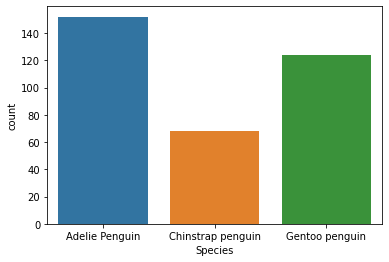

In [40]:
# Species Graph
sns.countplot(x="Species",data=data)

In [41]:
data.Island.unique()

array(['Torgersen', 'Biscoe', 'Dream'], dtype=object)

<AxesSubplot:xlabel='Island', ylabel='count'>

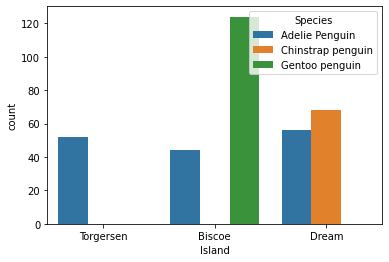

In [42]:
# Island graph on the basis of species
sns.countplot(x="Island",hue="Species",data=data)

<AxesSubplot:xlabel='Species', ylabel='Body Mass (g)'>

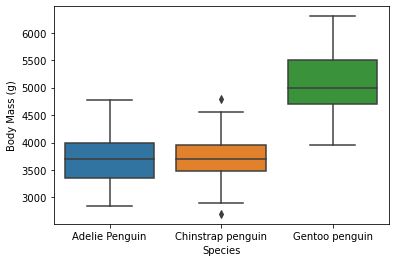

In [43]:
# Box plot for body mass and species
sns.boxplot(x="Species",y="Body Mass (g)",data=data)

<AxesSubplot:xlabel='Species', ylabel='Flipper Length (mm)'>

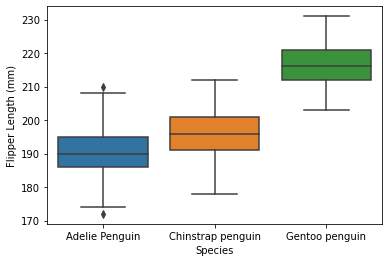

In [44]:
# Box plot for flipper length and species
sns.boxplot(x="Species",y="Flipper Length (mm)",data=data)

<AxesSubplot:xlabel='Species', ylabel='Culmen Length (mm)'>

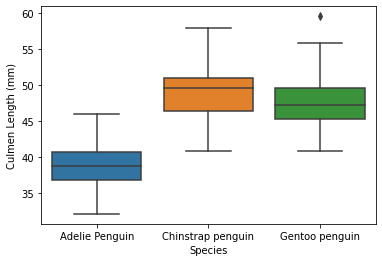

In [45]:
# Box plot for culmen length and species
sns.boxplot(x="Species",y="Culmen Length (mm)",data=data)

<AxesSubplot:xlabel='Species', ylabel='Culmen Depth (mm)'>

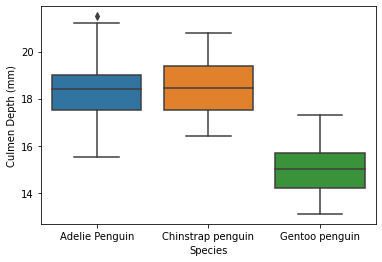

In [46]:
# Box plot for culmen depth and species
sns.boxplot(x="Species",y="Culmen Depth (mm)",data=data)

## Data Wrangling

In [47]:
# We are gonna drop irrelevant columns like studyName,Sample Number etc.
data.drop(["studyName","Sample Number","Region","Stage","Individual ID","Clutch Completion","Date Egg","Delta 15 N (o/oo)","Delta 13 C (o/oo)","Comments"],axis=1,inplace=True)

In [48]:
# Now we are gonna remove the null values
data.isnull().sum()

Species                 0
Island                  0
Culmen Length (mm)      2
Culmen Depth (mm)       2
Flipper Length (mm)     2
Body Mass (g)           2
Sex                    11
dtype: int64

<AxesSubplot:>

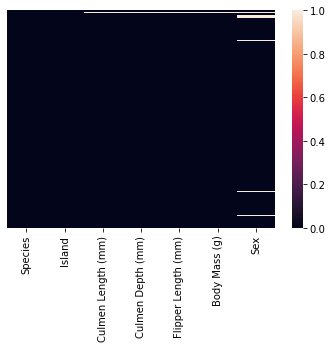

In [49]:
sns.heatmap(data.isnull(),yticklabels=False)

In [50]:
# Dropping all the null values in the dataset
data.dropna(inplace=True)
data.isnull().sum()

Species                0
Island                 0
Culmen Length (mm)     0
Culmen Depth (mm)      0
Flipper Length (mm)    0
Body Mass (g)          0
Sex                    0
dtype: int64

<AxesSubplot:>

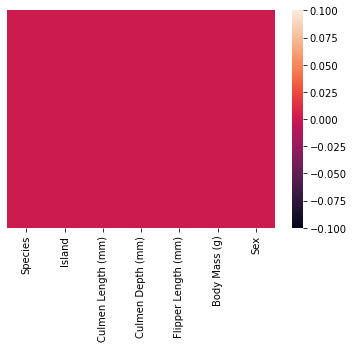

In [51]:
sns.heatmap(data.isnull(),yticklabels=False)

In [54]:
# getting dummy values for Sex and Island
sex = pd.get_dummies(data["Sex"],drop_first=True)
sex

,MALE
0,1
1,0
2,0
4,0
5,1
...,...
338,0
340,0
341,1
342,0


In [58]:
island = pd.get_dummies(data["Island"],drop_first=True)
island

,Dream,Torgersen
0,0,1
1,0,1
2,0,1
4,0,1
5,0,1
...,...,...
338,0,0
340,0,0
341,0,0
342,0,0


In [59]:
# Concatenating the dummy value columns to the main data
data = pd.concat([data,sex,island],axis=1)

In [61]:
# Dropping the old columns, Island and Sex
data.drop(["Island","Sex"],axis=1,inplace=True)

In [74]:
# Dataset after data wrangling
data.head(10)

,Species,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),MALE,Dream,Torgersen
0,Adelie Penguin,39.1,18.7,181.0,3750.0,1,0,1
1,Adelie Penguin,39.5,17.4,186.0,3800.0,0,0,1
2,Adelie Penguin,40.3,18.0,195.0,3250.0,0,0,1
4,Adelie Penguin,36.7,19.3,193.0,3450.0,0,0,1
5,Adelie Penguin,39.3,20.6,190.0,3650.0,1,0,1
6,Adelie Penguin,38.9,17.8,181.0,3625.0,0,0,1
7,Adelie Penguin,39.2,19.6,195.0,4675.0,1,0,1
12,Adelie Penguin,41.1,17.6,182.0,3200.0,0,0,1
13,Adelie Penguin,38.6,21.2,191.0,3800.0,1,0,1
14,Adelie Penguin,34.6,21.1,198.0,4400.0,1,0,1


## Training and Testing

In [63]:
x = data.drop("Species",axis=1)
y = data["Species"]

In [69]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=35)

In [70]:
model = RandomForestClassifier(n_estimators=8,criterion='entropy',random_state=35)
model.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', n_estimators=8, random_state=35)

In [71]:
predictions = model.predict(x_test)

In [72]:
# Calculating the accuracy of the model
score = accuracy_score(y_test,predictions)*100
score

99.0

In [73]:
# Saving the Random Forest model
joblib.dump(model, 'Penguin-Classification-ML.joblib')

['Penguin-Classification-ML.joblib']